## Topic: 07 - Classification
## Date: 10/22/2018
## Name: Amine Naouas

In [614]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Challenge 1**

Load Data

In [615]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',
               names=['Class_Name',	'handicapped_infants','water_project_cost_sharing','adoption_of_the_budget_resolution','physician_fee_freeze','el_salvador_aid','religious_groups_in_schools','anti_satellite_test_ban','aid_to_nicaraguan_contras','mx_missile','immigration','synfuels_corporation_cutback','education_spending','superfund_right_to_sue','crime','duty_free_exports','export_administration_act_south_africa'],
               header=None)

In [616]:
df.head()

,Class_Name,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [617]:
df.shape

(435, 17)

Transform ys in 1s and ns in 0s

In [618]:
df[df=='y']=1

In [619]:
df[df=='n']=0

In [620]:
for s in list(df.columns):
    if s != 'Class_Name':
        df[s]=pd.to_numeric(df[s], errors='coerce')

Let's look at the votes statistics.

In [621]:
df.iloc[:,1:].mean()

handicapped_infants                       0.442080
water_project_cost_sharing                0.503876
adoption_of_the_budget_resolution         0.596698
physician_fee_freeze                      0.417453
el_salvador_aid                           0.504762
religious_groups_in_schools               0.641509
anti_satellite_test_ban                   0.567696
aid_to_nicaraguan_contras                 0.576190
mx_missile                                0.501211
immigration                               0.504673
synfuels_corporation_cutback              0.362319
education_spending                        0.423267
superfund_right_to_sue                    0.509756
crime                                     0.593301
duty_free_exports                         0.427518
export_administration_act_south_africa    0.812689
dtype: float64

Fill missing with the probability.

In [622]:
df=df.fillna(df.mean())

Alternative : replace the missing votes by the avearge vote of the correspondant political group.

In [317]:
# df.groupby(['Class_Name']).mean().reset_index()

In [318]:
# df.iloc[:,1:]=df.groupby("Class_Name").transform(lambda x: x.fillna(x.mean()))

**Challenge 2**

In [319]:
from sklearn.cross_validation import train_test_split

In [320]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [321]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [322]:
# train_df = X_train.copy()
# train_df['Class_Name'] = y_train

**Challenge 3**

In [323]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [324]:
dict={}
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    dict[k]=accuracy_score(y_test, y_pred)
    print(k,accuracy_score(y_test, y_pred))

1 0.9310344827586207
2 0.9367816091954023
3 0.9540229885057471
4 0.9482758620689655
5 0.9367816091954023
6 0.9310344827586207
7 0.9195402298850575
8 0.9252873563218391
9 0.9367816091954023
10 0.9310344827586207
11 0.9367816091954023
12 0.9310344827586207
13 0.9310344827586207
14 0.9310344827586207
15 0.9310344827586207
16 0.9310344827586207
17 0.9367816091954023
18 0.9367816091954023
19 0.9367816091954023
20 0.9310344827586207


In [325]:
(max(dict, key=dict.get),dict[max(dict, key=dict.get)])

(3, 0.9540229885057471)

The highest accuracy score is achieved by k=3.

**Challenge 4**

In [326]:
from sklearn.linear_model import LogisticRegression

In [327]:
lr = LogisticRegression(C=1000000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_accuracy=accuracy_score(y_pred, y_test)
lr_accuracy

0.9770114942528736

**Challenge 5**

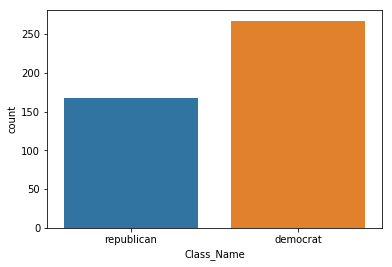

In [328]:
sns.countplot(x = 'Class_Name',data=df)

In [329]:
df['Class_Name'].value_counts()

democrat      267
republican    168
Name: Class_Name, dtype: int64

In [330]:
all_democrats=np.repeat('democrat', y_test.shape[0])

In [331]:
all_democrats_accuracy=accuracy_score(all_democrats, y_test)
all_democrats_accuracy

0.6609195402298851

In [332]:
all_republicans=np.repeat('republican', y_test.shape[0])

In [333]:
all_republicans_accuracy=accuracy_score(all_republicans, y_test)
all_republicans_accuracy

0.3390804597701149

**Challenge 6**

In [334]:
x= list(dict.keys())
y1=list(dict.values())
y2=np.repeat(lr_accuracy, len(x))
y3=np.repeat(all_democrats_accuracy, len(x))
y4=np.repeat(all_republicans_accuracy, len(x))

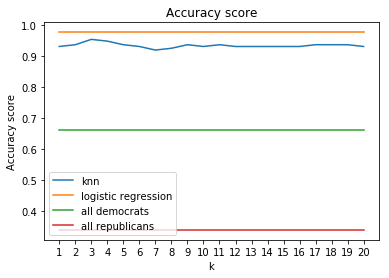

In [335]:
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)
plt.xticks(x, [str(i) for i in x])
plt.title('Accuracy score')
plt.ylabel('Accuracy score')
plt.xlabel('k')
plt.legend(['knn', 'logistic regression', 'all democrats', 'all republicans']);


**Challenge 7**

In [336]:
from sklearn.learning_curve import learning_curve

In [338]:
train_sizes, train_scores, test_scores =learning_curve(lr,X,y,cv=5)

learning_curve returns the accuracy scores, not the errors...

In [339]:
train_err=1-train_scores
test_err=1-test_scores
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(test_err, axis=1)

In [340]:
knn = KNeighborsClassifier(n_neighbors=3)
train_sizes2, train_scores2, test_scores2 =learning_curve(knn,X,y,cv=5)
train_err2=1-train_scores2
test_err2=1-test_scores2
train_cv_err2 = np.mean(train_err2, axis=1)
test_cv_err2 = np.mean(test_err2, axis=1)

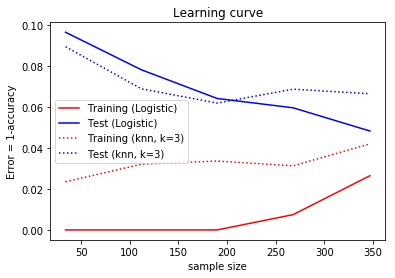

In [341]:
plt.plot(train_sizes,train_cv_err, c ='r')
plt.plot(train_sizes,test_cv_err, c ='b')
plt.plot(train_sizes2,train_cv_err2, linestyle = ':', c ='r')
plt.plot(train_sizes2,test_cv_err2, linestyle = ':', c ='b')
plt.title('Learning curve')
plt.ylabel('Error = 1-accuracy')
plt.xlabel('sample size')
plt.legend(['Training (Logistic)', 'Test (Logistic)','Training (knn, k=3)', 'Test (knn, k=3)']);


**Challenge 8**

In [342]:
from sklearn.naive_bayes import GaussianNB

In [343]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
nb_accuracy=accuracy_score(y_pred, y_test)
nb_accuracy

0.9425287356321839

In [344]:
from sklearn.svm import SVC

In [345]:
svc = SVC(kernel='rbf', C=5)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
svc_accuracy=accuracy_score(y_pred, y_test)
svc_accuracy

0.9770114942528736

In [346]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
dt_accuracy=accuracy_score(y_pred, y_test)
dt_accuracy

0.9425287356321839

In [348]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_accuracy=accuracy_score(y_pred, y_test)
rf_accuracy

0.9770114942528736

**Challenge 9**

In [349]:
from sklearn.cross_validation import cross_val_score

In [350]:
np.mean(cross_val_score(lr,X_train,y_train, cv=5, scoring='accuracy'))

0.9351205213580351

In [351]:
np.mean(cross_val_score(knn,X_train,y_train, cv=5, scoring='accuracy'))

0.931123537949287

In [352]:
np.mean(cross_val_score(nb,X,y, cv=5, scoring='accuracy'))

0.9401442249277053

In [353]:
np.mean(cross_val_score(svc,X_train,y_train, cv=5, scoring='accuracy'))

0.9424471385070718

In [354]:
np.mean(cross_val_score(dt,X_train,y_train, cv=5, scoring='accuracy'))

0.9083368906343379

In [355]:
np.mean(cross_val_score(rf,X_train,y_train, cv=5, scoring='accuracy'))

0.9348999686957512

**Challenge 10**

In [356]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',
               names=['Class_Name',	'handicapped_infants','water_project_cost_sharing','adoption_of_the_budget_resolution','physician_fee_freeze','el_salvador_aid','religious_groups_in_schools','anti_satellite_test_ban','aid_to_nicaraguan_contras','mx_missile','immigration','synfuels_corporation_cutback','education_spending','superfund_right_to_sue','crime','duty_free_exports','export_administration_act_south_africa'],
               header=None)
df[df=='y']=1
df[df=='n']=0

A will work on the handicapped_infants vote.

In [357]:
X=df.iloc[:,2:]
y=df.iloc[:,1]

In [358]:
y.value_counts()

0    236
1    187
?     12
Name: handicapped_infants, dtype: int64

We keep only the representatives that voted on handicapped_infants.

In [359]:
X_known=X[y != '?'].copy()
y_known=y[y != '?'].copy()

In [360]:
# X_unknown=X[y == '?'].copy()
# y_unknown=y[y == '?'].copy()

In [361]:
for s in list(X_known.columns):
    X_known[s]=pd.to_numeric(X_known[s], errors='coerce')
    X_known[s].fillna(X_known[s].mode()[0], inplace=True)

In [365]:
y_known=pd.to_numeric(y_known, errors='coerce')

In [366]:
np.mean(cross_val_score(lr,X_known,y_known, cv=5, scoring='accuracy'))

0.6853677284867435

The cross validation score is  only 69 %.

**Challenge 11**

In [468]:
df2=pd.read_csv('2013_movies.csv',parse_dates=['ReleaseDate'], infer_datetime_format=True)

/home/amine/anaconda3/lib/python3.7/site-packages/dateutil/parser/__init__.py:46: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


In [469]:
df2['month']=df2.ReleaseDate.transform(lambda d: d.month)

In [470]:
df2.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,month
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22,11
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03,5
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22,11
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03,7
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14,6


In [471]:
df2.shape

(100, 8)

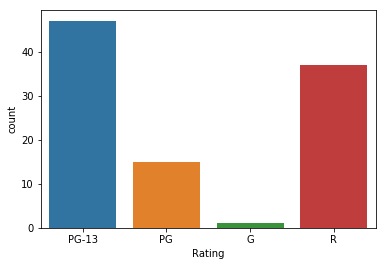

In [472]:
sns.countplot(x = 'Rating',data=df2)

Let's aggregate 'G' and 'PG'

In [473]:
df2['Rating_bis']=df2['Rating'].transform(lambda r: 'PG' if r=='G' else r)

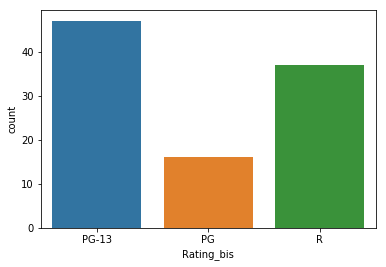

In [511]:
sns.countplot(x = 'Rating_bis',data=df2)

Let's see if we have missing values in the features

In [475]:
df2['Budget'].isna().value_counts()

False    89
True     11
Name: Budget, dtype: int64

For simplicity,  I will delete observations with missing Budget

In [476]:
df3=df2[~df2['Budget'].isna()]

In [477]:
df3.shape

(89, 9)

In [526]:
X=df3.iloc[:,[1,2,5]]
y=df3['Rating_bis']

In [527]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [528]:
lr = LogisticRegression(C=1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_accuracy=accuracy_score(y_pred, y_test)
print( "Logistic regression's test score is "+str(lr_accuracy))

Logistic regression's test score is 0.48148148148148145


In [529]:
# if we want to cross validate the parameter C
# dict={}
# for C in 10**(np.linspace(-1,6,50)):
#     lr = LogisticRegression(C=C)
#     lr.fit(X_train, y_train)
#     dict[k]=np.mean(cross_val_score(lr,X_train,y_train, cv=5, scoring='accuracy'))
#     print(k,np.mean(cross_val_score(lr,X_train,y_train, cv=5, scoring='accuracy')))

In [530]:
dict={}
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    dict[k]=np.mean(cross_val_score(knn,X_train,y_train, cv=5, scoring='accuracy'))
    print(k,np.mean(cross_val_score(knn,X_train,y_train, cv=5, scoring='accuracy')))

1 0.5348484848484849
2 0.45476190476190476
3 0.5452380952380953
4 0.5746753246753247
5 0.5707792207792207
6 0.5437229437229436
7 0.5761904761904763
8 0.5452380952380953
9 0.5428571428571429
10 0.49610389610389605
11 0.5491341991341991
12 0.5982683982683982
13 0.5658008658008657
14 0.5658008658008657
15 0.530952380952381
16 0.5452380952380953
17 0.5261904761904762
18 0.5753246753246752
19 0.5571428571428572
20 0.5428571428571429


In [531]:
(max(dict, key=dict.get),dict[max(dict, key=dict.get)])

(12, 0.5982683982683982)

Best CV score is achieved with k=12

In [532]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accuracy=accuracy_score(y_test, y_pred)
print( "KNN(k=12)'s test score is "+str(knn_accuracy))

KNN(k=12)'s test score is 0.4444444444444444


Baseline model

In [533]:
baseline_pred=np.repeat('PG-13', y_test.shape[0])

In [534]:
baseline_accuracy=accuracy_score(y_test, baseline_pred)
print( "Baseline model's test score is "+str(baseline_accuracy))

Baseline model's test score is 0.48148148148148145


The stupid model performs better than KNN and worse that the logistic regression.

In [535]:
list(zip(X_train,lr.coef_.transpose()))

[('Budget', array([-7.75460296e-09,  1.10625687e-08, -2.50296952e-08])),
 ('DomesticTotalGross',
  array([-2.03275522e-09, -6.69403482e-09,  5.93079063e-09])),
 ('Runtime', array([-1.38769972e-13, -4.54054333e-14,  1.89947046e-13]))]

Budget is positively related ot the 2nd modality.  
DomesticTotalGross is positively related to the the 3rd modality.  
Runtime is positively related to the 3rd modality.  

**Challenge 12**

In [536]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data',
               names=['age', 'year', 'nodes', 'survival'],
               header=None)


In [537]:
df.head()

,age,year,nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [538]:
df.age.mean()

52.45751633986928

In [539]:
df.age.std()

10.80345234930328

In [544]:
df.groupby(['survival']).agg({'age':['mean','std']}).reset_index()

survival        age           
                 mean        std
0        1  52.017778  11.012154
1        2  53.679012  10.167137

(array([16., 27., 46., 53., 55., 41., 41., 18.,  7.,  2.]),
 array([30. , 35.3, 40.6, 45.9, 51.2, 56.5, 61.8, 67.1, 72.4, 77.7, 83. ]),
 <a list of 10 Patch objects>)

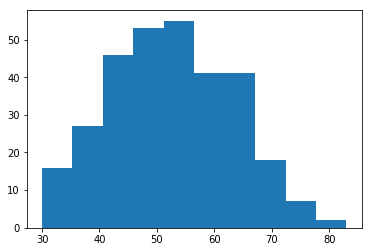

In [545]:
plt.hist(df.age)

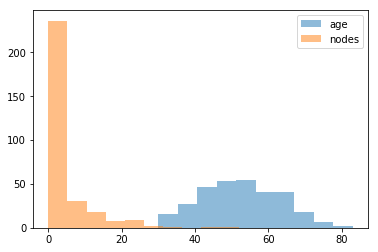

In [548]:
from matplotlib import pyplot
pyplot.hist(df.age, alpha=0.5, label='age')
pyplot.hist(df.nodes, alpha=0.5, label='nodes')
pyplot.legend(loc='upper right');

In [549]:
df.year.min()

58

In [550]:
df.year.max()

69

In [584]:
X=df.iloc[:,0:-1]
y=(df.iloc[:,-1]==1)*1

In [592]:
y.value_counts()

1    225
0     81
Name: survival, dtype: int64

Unbalanced data..

In [585]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [586]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)

In [587]:
scaler.mean_

array([52.76168224, 62.87383178,  3.78971963])

In [588]:
scaler.scale_ 

array([10.92644178,  3.31492903,  7.11374127])

In [589]:
X_tr=scaler.transform(X_train) 
X_te=scaler.transform(X_test) 

In [590]:
lr = LogisticRegression()
lr.fit(X_tr, y_train)
y_pred = lr.predict(X_te)
print( "Logistic regression's test accuracy is "+str(accuracy_score(y_pred, y_test)))

Logistic regression's test accuracy is 0.7282608695652174


In [605]:
list(zip(X_train.columns,lr.coef_[0]))

[('age', -0.3011022135920721),
 ('year', 0.14246051656601058),
 ('nodes', -0.624338045053607)]

Survival probability decrease with age, increases with the year of operation (science development) and decreases with the number of nodes.

In [606]:
train_sizes, train_scores, test_scores =learning_curve(lr,X,y,cv=5)

In [612]:
tr_average_socre=np.mean(train_scores, axis=1)
te_average_socre=np.mean(test_scores, axis=1)

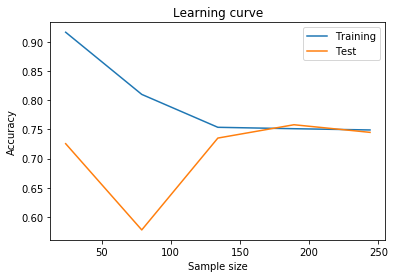

In [613]:
plt.plot(train_sizes,tr_average_socre)
plt.plot(train_sizes,te_average_socre)
plt.title('Learning curve')
plt.ylabel('Accuracy')
plt.xlabel('Sample size')
plt.legend(['Training', 'Test']);